# K-NEAREST NEIGHBOURS(KNN) ALGORITHM

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import neighbors


In [2]:
#reading the csv file
ccd=pd.read_csv("credit_card_dataset.csv")

In [3]:
#printing the top 5 element
ccd.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


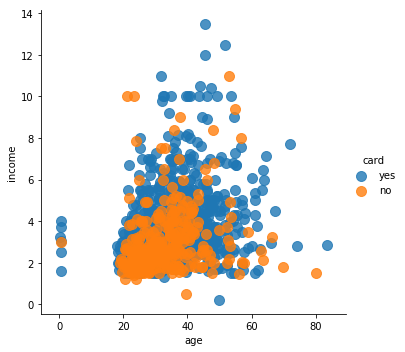

In [4]:
#finding the clutering of age and income for cards
import seaborn
seaborn.lmplot('age','income', data=ccd, fit_reg=False,hue='card',scatter_kws={"marker": "D","s": 100})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


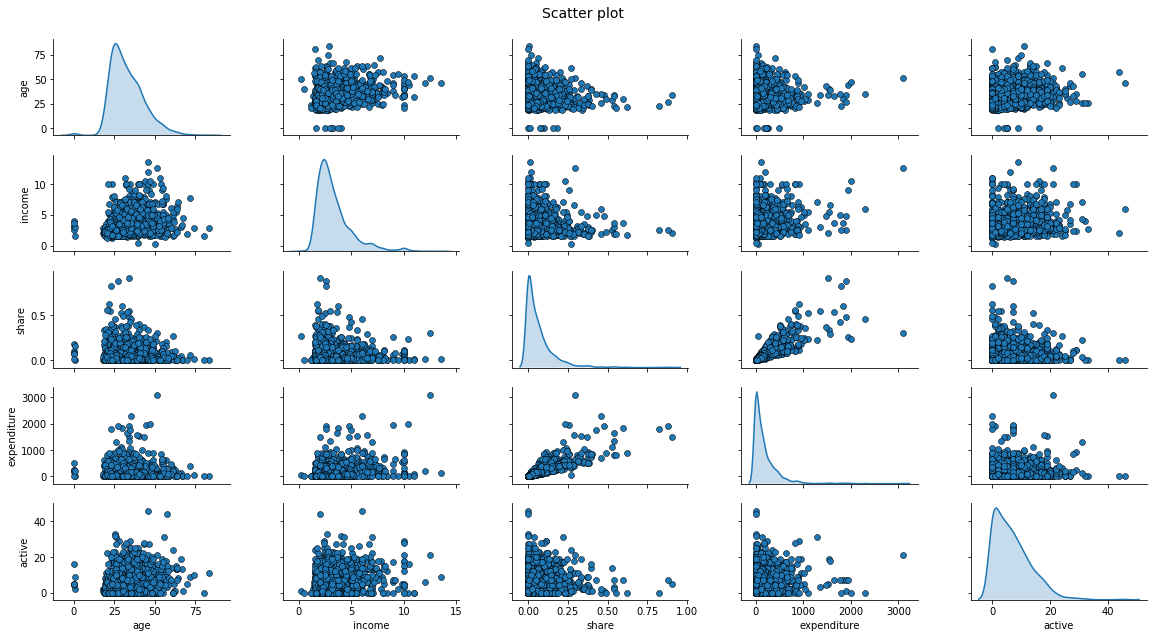

In [5]:
# Pair-wise Scatter Plots
# reports age income share expenditure owner selfemp dependents months majorcards active
cols = ['age', 'income','share','expenditure','active','card']
pp = sns.pairplot(ccd[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Scatter plot', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


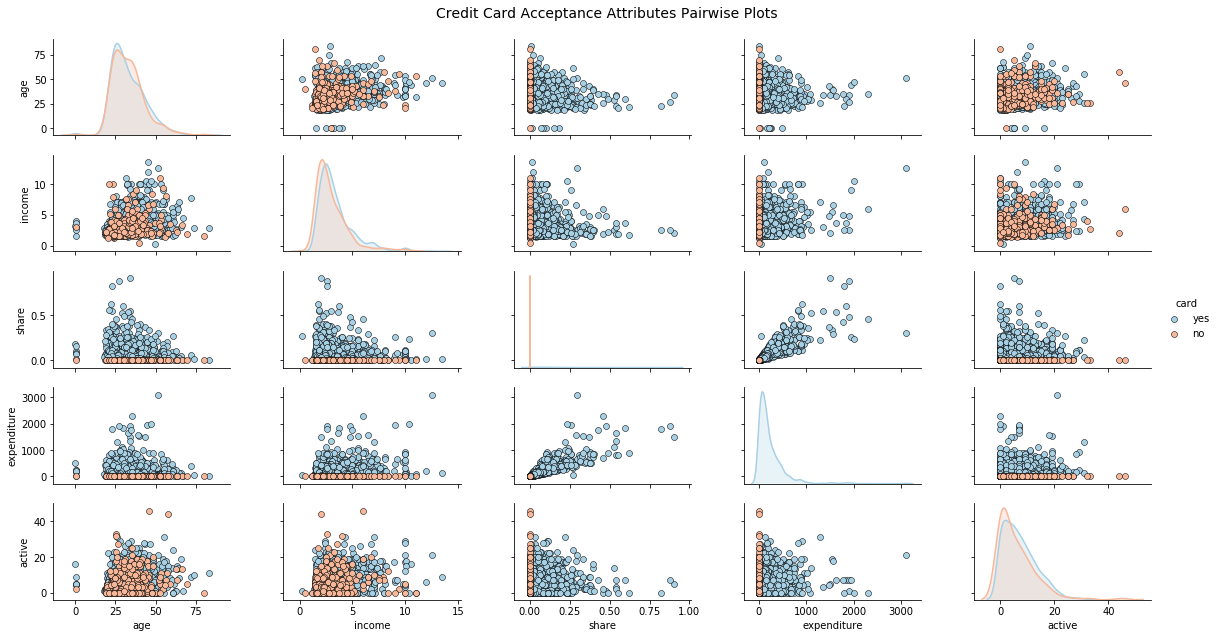

In [6]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['age', 'income','share','expenditure','active','card']
pp = sns.pairplot(ccd[cols], hue='card', size=1.8, aspect=1.8, 
                  palette='RdBu_r',
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Credit Card Acceptance Attributes Pairwise Plots', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


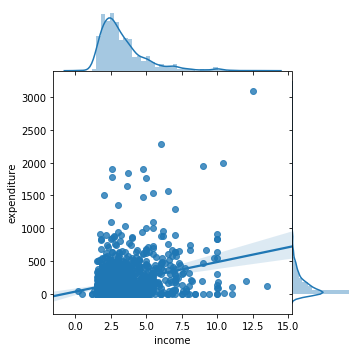

In [7]:
# Joint Plot
jp = sns.jointplot(x='income', y='expenditure', data=ccd,
                   kind='reg', space=0, size=5, ratio=4)

In [8]:
#changing values from yes and no to 1 and 0
def impute_AffirmativeNegative(cols):
    affirmativeNegative=cols[0] 
    
    if (affirmativeNegative == 'yes'):    
        return 1
    elif (affirmativeNegative == 'no'):
        return 0
    else:
        return 100
        

In [9]:
ccd['card']=ccd[['card']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
ccd.head(n=12)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,1,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,1,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,1,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,1,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,1,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [10]:
#dividing into features attribute
X = ccd.as_matrix(columns=['age', 'income','share','expenditure','reports','active'])
y = np.array(ccd['card'])
print ("X: ",X)
print ("y: ",y)

X:  [[3.766667e+01 4.520000e+00 3.326991e-02 1.249833e+02 0.000000e+00
  1.200000e+01]
 [3.325000e+01 2.420000e+00 5.216942e-03 9.854167e+00 0.000000e+00
  1.300000e+01]
 [3.366667e+01 4.500000e+00 4.155556e-03 1.500000e+01 0.000000e+00
  5.000000e+00]
 ...
 [4.058333e+01 4.600000e+00 2.651261e-02 1.012983e+02 0.000000e+00
  2.000000e+00]
 [3.283333e+01 3.700000e+00 8.998919e-03 2.699667e+01 0.000000e+00
  7.000000e+00]
 [4.825000e+01 3.700000e+00 1.116186e-01 3.441575e+02 0.000000e+00
  0.000000e+00]]
y:  [1 1 1 ... 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
#importing modules
from sklearn import neighbors
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn .preprocessing import StandardScaler

In [12]:
print(X)

[[3.766667e+01 4.520000e+00 3.326991e-02 1.249833e+02 0.000000e+00
  1.200000e+01]
 [3.325000e+01 2.420000e+00 5.216942e-03 9.854167e+00 0.000000e+00
  1.300000e+01]
 [3.366667e+01 4.500000e+00 4.155556e-03 1.500000e+01 0.000000e+00
  5.000000e+00]
 ...
 [4.058333e+01 4.600000e+00 2.651261e-02 1.012983e+02 0.000000e+00
  2.000000e+00]
 [3.283333e+01 3.700000e+00 8.998919e-03 2.699667e+01 0.000000e+00
  7.000000e+00]
 [4.825000e+01 3.700000e+00 1.116186e-01 3.441575e+02 0.000000e+00
  0.000000e+00]]


In [13]:
#fit function
standardizer=StandardScaler()
X_std=standardizer.fit_transform(X)
print("X_std:\n",X_std)

X_std:
 [[ 4.39253790e-01  6.81894274e-01 -3.74787405e-01 -2.20765540e-01
  -3.39396801e-01  7.93701110e-01]
 [ 3.63911355e-03 -5.58317282e-01 -6.71268739e-01 -6.43854432e-01
  -3.39396801e-01  9.52345111e-01]
 [ 4.47351355e-02  6.70082735e-01 -6.82486130e-01 -6.24943973e-01
  -3.39396801e-01 -3.16806899e-01]
 ...
 [ 7.26922985e-01  7.29140428e-01 -4.46202783e-01 -3.07805719e-01
  -3.39396801e-01 -7.92738902e-01]
 [-3.74569084e-02  1.97621190e-01 -6.31298437e-01 -5.80857323e-01
  -3.39396801e-01  4.81103870e-04]
 [ 1.48308407e+00  1.97621190e-01  4.53250616e-01  5.84679331e-01
  -3.39396801e-01 -1.11002690e+00]]


In [14]:
#importing knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=10,metric="euclidean",   n_jobs=-1).fit(X_std,y)

In [16]:
pipe=Pipeline([("standardizer",standardizer),("knn",knn)])
search_space=[{"knn__n_neighbors":[1,2,3,4,5,6]}]

In [17]:
#creating a classifier
clf=GridSearchCV(pipe,search_space,cv=4,verbose=1).fit(X,y)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   25.2s finished


In [18]:
clf.best_estimator_.get_params()["knn__n_neighbors"]

5

In [19]:
clf = neighbors.KNeighborsClassifier( 5,weights = 'uniform')
ccd = clf.fit(X_std, y)
print ("ccd: ",ccd)

ccd:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [20]:
print("Trained Model : ",ccd)

Trained Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [21]:
#finding the prediction of getting card
score1=ccd.score(X,y)
score1

0.7816527672479151

# NAIVE BAYES ALGORITHM

Naive Bayes is simple classifier known for doing well when only a small number of observations are available. 
In this case study, we will create  a Gaussian Naive Bayes classifier from the scratch and use it to predict the
class of a previously unseen data point.

In [22]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [23]:
credit5 = pd.read_csv('credit_card_dataset.csv')
credit5.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [24]:
#CHANGING THE DATASET OWNERS AND SELF EMP VALUE NON NUMERIC TO NUMMERIC
credit5.owner[credit5.owner=='yes']=1
credit5.owner[credit5.owner=='no']=0
credit5.selfemp[credit5.selfemp=='yes']=1
credit5.selfemp[credit5.selfemp=='no']=0
credit5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [25]:
# create a list of the feature column's names
features = credit5.columns[1:]
# view features
features

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [26]:
# train["card"] contains the wether they will get the card or not. Before we can 
# use it, we need to convert each card name into a digit. So, in 
# this case, there are two condition, which have been coded as 0, 1.
y = pd.factorize(credit5["card"])[0]    # here 0 denotes sequence no.
# view target
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# create a random forest classifier. by convention, clf means 
# "Classifier"
clf = RandomForestClassifier(n_jobs=2,random_state=0)
# train the classifier to take the training features and learn how they 
# relate to the training y (the card)
clf.fit(credit5[features],y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
# view a list of the features and their importance scores
list(zip(credit5[features],clf.feature_importances_))

[('reports', 0.09550736669109822),
 ('age', 0.02300965599333623),
 ('income', 0.027262007634060982),
 ('share', 0.46438927431008914),
 ('expenditure', 0.33466257413571643),
 ('owner', 0.004918163741501721),
 ('selfemp', 0.0016632075349418205),
 ('dependents', 0.003196529206123217),
 ('months', 0.015831720863021464),
 ('majorcards', 0.00469187475893188),
 ('active', 0.024867625131178905)]

In [29]:
# create an empty dataframe
mycard = pd.DataFrame()
# create some feature values for this single row
mycard["reports"] = [0]
mycard["age"] = [33]
mycard["income"] = [2]
mycard["share"] = [0.005217]
mycard["expenditure"] = [9.854167]
mycard["owner"] = ['no']
mycard["selfemp"] = ['no']
mycard["dependents"] = [3]
mycard["months"] = [34]
mycard["majorcards"] = [1]
mycard["active"] = [13]
# view the data
mycard

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,33,2,0.005217,9.854167,no,no,3,34,1,13


In [30]:
# No of credit cards accepted
n_yes = credit5["card"][credit5["card"] == "yes"].count()

# No of credit cards not accepted
n_no = credit5["card"][credit5["card"] == "no"].count()

# total no. of credit card applicants
total_applicants = credit5["card"].count()
print ("Count of credit cards accepted =",n_yes)
print ("Count of credit cards declined =",n_no)
print ("Total no. of credit card applicants =",total_applicants)

Count of credit cards accepted = 1023
Count of credit cards declined = 296
Total no. of credit card applicants = 1319


In [31]:
# Probability of ACCEPTANCE
p_yes = n_yes / total_applicants
# Probability of DECLINATION
p_no = n_no / total_applicants
print ("Probability of ACCEPTANCE =",p_yes)
print("Probability of DECLINATION=",p_no)

Probability of ACCEPTANCE = 0.775587566338135
Probability of DECLINATION= 0.22441243366186506


In [32]:
# group the data by ACCEPTANCE OR DECLINATION and calculate the mean of each feature
data_means = credit5.groupby("card").mean()
# view the values
data_means
#it finds the mean of the numeric values

,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,,,,,,,,,
no,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054
yes,0.129032,33.216031,3.451273,0.088482,238.602421,0.969697,55.258065,0.839687,7.269795


In [33]:
# group the data by ACCEPTANCE OR DECLINATION and calculate the variance of each feature
data_variance = credit5.groupby("card").var()
# view the values
data_variance

,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,,,,,,,,,
no,5.829546,98.431938,2.609312,4.541067e-08,0.000000,1.597332,5115.539796,0.193117,48.336051
yes,0.173158,104.259465,2.914247,9.814900e-03,82776.945208,1.544091,4187.375608,0.134744,36.995633


In [34]:
# means for ACCEPTED credit cards
yes_reports_mean=data_means["reports"][data_means.index=="yes"].values[0]
yes_age_mean=data_means["age"][data_means.index=="yes"].values[0]
yes_income_mean=data_means["income"][data_means.index=="yes"].values[0]
yes_share_mean=data_means["share"][data_means.index=="yes"].values[0]
yes_expenditure_mean=data_means["expenditure"][data_means.index=="yes"].values[0]
#yes_dependents_mean=data_means["dependents"][data_means.index=="yes"].values[0]
#yes_months_mean=data_means["months"][data_means.index=="yes"].values[0]
#yes_majorcards_mean=data_means["majorcards"][data_means.index=="yes"].values[0]
yes_active_mean=data_means["active"][data_means.index=="yes"].values[0]
print (yes_reports_mean,yes_age_mean,yes_income_mean,yes_share_mean,yes_expenditure_mean,yes_active_mean)

0.12903225806451613 33.216031156696026 3.4512730205278537 0.08848152972434016 238.60242068103614 7.269794721407624


In [35]:
# means for DECLINED credit cards
no_reports_mean=data_means["reports"][data_means.index=="no"].values[0]
no_age_mean=data_means["age"][data_means.index=="no"].values[0]
no_income_mean=data_means["income"][data_means.index=="no"].values[0]
no_share_mean=data_means["share"][data_means.index=="no"].values[0]
no_expenditure_mean=data_means["expenditure"][data_means.index=="no"].values[0]
#no_dependents_mean=data_means["dependents"][data_means.index=="no"].values[0]
#no_months_mean=data_means["months"][data_means.index=="no"].values[0]
#no_majorcards_mean=data_means["majorcards"][data_means.index=="no"].values[0]
no_active_mean=data_means["active"][data_means.index=="no"].values[0]
print (no_reports_mean,yes_age_mean,no_income_mean,no_share_mean,no_expenditure_mean,no_active_mean)

1.587837837837838 33.216031156696026 3.0685091216216236 0.00047679549999999976 0.0 6.054054054054054


In [36]:
# variance for ACCEPTED credit cards
yes_reports_var=data_variance["reports"][data_variance.index=="yes"].values[0]
yes_age_var=data_variance["age"][data_variance.index=="yes"].values[0]
yes_income_var=data_variance["income"][data_variance.index=="yes"].values[0]
yes_share_var=data_variance["share"][data_variance.index=="yes"].values[0]
yes_expenditure_var=data_variance["expenditure"][data_variance.index=="yes"].values[0]
#yes_dependents_var=data_variance["dependents"][data_variance.index=="yes"].values[0]
#yes_months_var=data_variance["months"][data_variance.index=="yes"].values[0]
#yes_majorcards_var=data_variance["majorcards"][data_variance.index=="yes"].values[0]
yes_active_var=data_variance["active"][data_variance.index=="yes"].values[0]

print(yes_reports_var,yes_age_var,yes_income_var,yes_share_var,yes_expenditure_var,yes_active_var)

0.17315826021084516 104.25946494182891 2.9142465930287327 0.009814900088786917 82776.94520800894 36.99563273668445


In [37]:
# variance for DECLINED credit cards
no_reports_var=data_variance["reports"][data_variance.index=="yes"].values[0]
no_age_var=data_variance["age"][data_variance.index=="yes"].values[0]
no_income_var=data_variance["income"][data_variance.index=="yes"].values[0]
no_share_var=data_variance["share"][data_variance.index=="yes"].values[0]
no_expenditure_var=data_variance["expenditure"][data_variance.index=="yes"].values[0]
#no_dependents_var=data_variance["dependents"][data_variance.index=="yes"].values[0]
#no_months_var=data_variance["months"][data_variance.index=="yes"].values[0]
#no_majorcards_var=data_variance["majorcards"][data_variance.index=="yes"].values[0]
no_active_var=data_variance["active"][data_variance.index=="yes"].values[0]

print (no_reports_var,no_age_var, no_income_var,no_share_var, no_expenditure_var, no_active_var)

0.17315826021084516 104.25946494182891 2.9142465930287327 0.009814900088786917 82776.94520800894 36.99563273668445


In [38]:
# create a function that calculates p(x | y):
def p_x_given_y(x,mean_y,variance_y):
    # input the arguments into a probability density function
    p = 1 / (np.sqrt(2 * np.pi * variance_y)) * \
       np.exp((-(x - mean_y) ** 2) / (2 * variance_y))
    # return p
    return p

In [39]:
# numerator of the posterior if the unclassified observation is "ACCEPTED credit card"

posterior_numerator_accepted = p_yes * \
   p_x_given_y(mycard["reports"][0],yes_reports_mean,yes_reports_var) * \
   p_x_given_y(mycard["age"][0],yes_age_mean,yes_age_var) * \
   p_x_given_y(mycard["income"][0],yes_income_mean,yes_income_var) * \
   p_x_given_y(mycard["share"][0],yes_share_mean,yes_share_var) * \
   p_x_given_y(mycard["expenditure"][0],yes_expenditure_mean,yes_expenditure_var) * \
   p_x_given_y(mycard["active"][0],yes_active_mean,yes_active_var)

In [40]:
# numerator of the posterior if the unclassified observation is "DECLINED credit card"

posterior_numerator_declined = p_no * \
   p_x_given_y(mycard["reports"][0],no_reports_mean,no_reports_var) * \
   p_x_given_y(mycard["age"][0],no_age_mean,no_age_var) * \
   p_x_given_y(mycard["income"][0],no_income_mean,no_income_var) * \
   p_x_given_y(mycard["share"][0],no_share_mean,no_share_var) * \
   p_x_given_y(mycard["expenditure"][0],no_expenditure_mean,no_expenditure_var) * \
   p_x_given_y(mycard["active"][0],no_active_mean,no_active_var)

In [41]:
print ("Numerator of Posterior ACCEPTED =",posterior_numerator_accepted)
print ("Numerator of Posterior DECLINED =",posterior_numerator_declined)
if (posterior_numerator_accepted >= posterior_numerator_declined):
    print ("Predicted that the card is ACCEPTED")
else:
    print ("Predicted that the card is DECLINED")

Numerator of Posterior ACCEPTED = 5.423535610569144e-07
Numerator of Posterior DECLINED = 2.1192398537956917e-10
Predicted that the card is ACCEPTED


In [42]:
score2=clf.score(credit5[features],y)
score2

1.0

# LOGISTIC REGRESSION

In [43]:
#IMPORTING MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
#to read the csv file
credit = pd.read_csv('credit_card_dataset.csv')
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


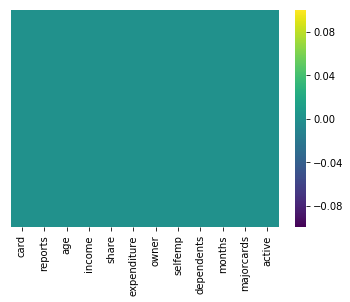

In [45]:
#to check any null or missing value is there or not
sns.heatmap(credit.isnull(),yticklabels=False,cbar=True,cmap='viridis')

yes    1023
no      296
Name: card, dtype: int64

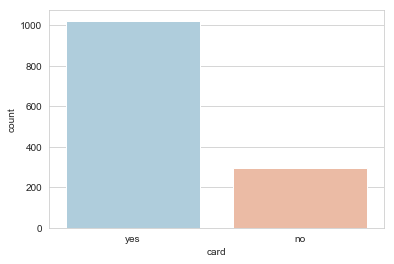

In [46]:
#number of people getting cards
sns.set_style('whitegrid')
sns.countplot(x='card',data=credit,palette='RdBu_r')
credit["card"].value_counts()

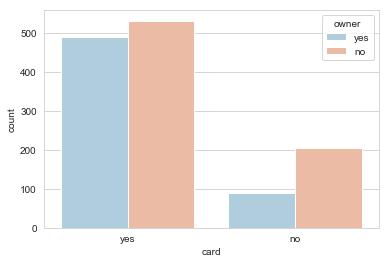

In [47]:
#owner can be excluded in analysis
sns.set_style('whitegrid')
sns.countplot(x='card',hue='owner',data=credit,palette='RdBu_r')

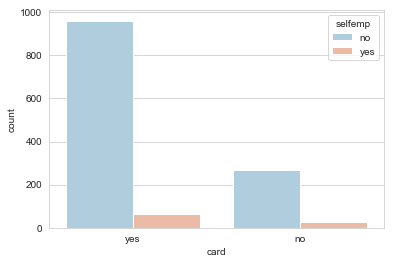

In [48]:
#selfemp is a significant determiner
sns.set_style('whitegrid')
sns.countplot(x='card',hue='selfemp',data=credit,palette='RdBu_r')

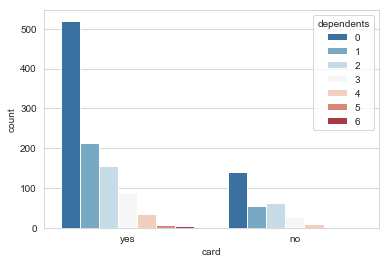

In [49]:
# dependents is a significant determiner
# less the number of dependents, more is the chance of getting a credit card.
sns.set_style('whitegrid')
sns.countplot(x='card',hue='dependents',data=credit,palette='RdBu_r')

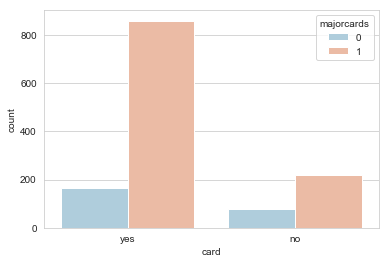

In [50]:
#To check if majorcards is a determiner
#Presence of major cards is a significant determiner.
#Presence of major cards increases the probability of card acceptance.
sns.set_style('whitegrid')
sns.countplot(x='card',hue='majorcards',data=credit,palette='RdBu_r')

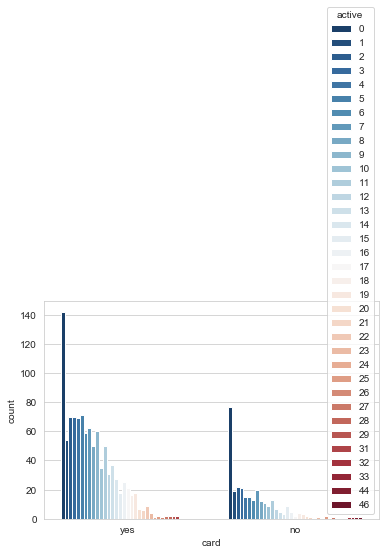

In [51]:
#To check if 'active' cards is a determiner
#Presence of 'active' cards is a moderate determiner.
#Presence of less 'active' cards increases the probability of card acceptance.
sns.set_style('whitegrid')
sns.countplot(x='card',hue='active',data=credit,palette='RdBu_r')

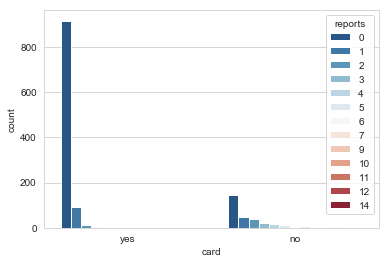

In [52]:
#To check if reports is a determiner
#Presence of crimal reports is a significant determiner.
#Presence of less criminal reports increases the probability of card acceptance.
sns.set_style('whitegrid')
sns.countplot(x='card',hue='reports',data=credit,palette='RdBu_r')

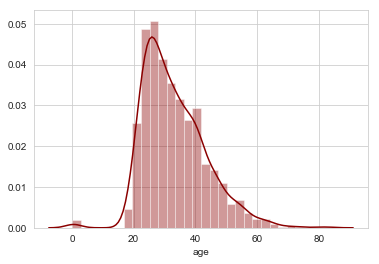

In [53]:
sns.distplot(credit['age'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

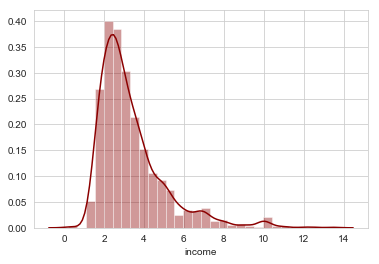

In [54]:
sns.distplot(credit['income'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

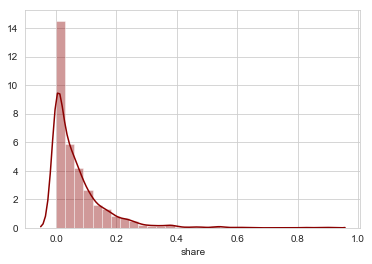

In [55]:
sns.distplot(credit['share'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

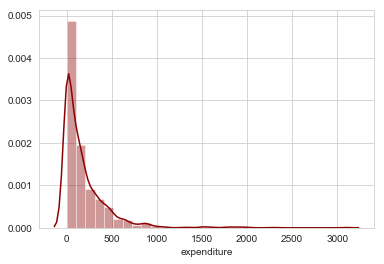

In [56]:
sns.distplot(credit['expenditure'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

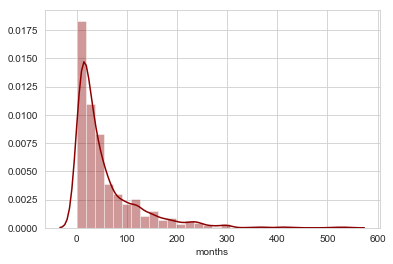

In [57]:
sns.distplot(credit['months'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

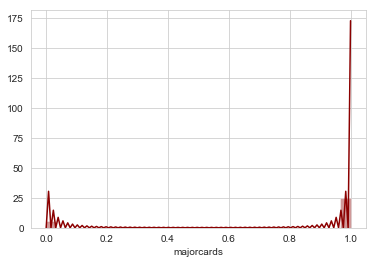

In [58]:
sns.distplot(credit['majorcards'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

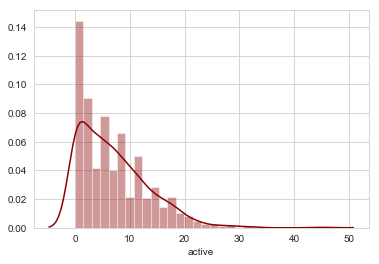

In [59]:
sns.distplot(credit['active'].dropna(),kde=True,color='darkred',bins=30);
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

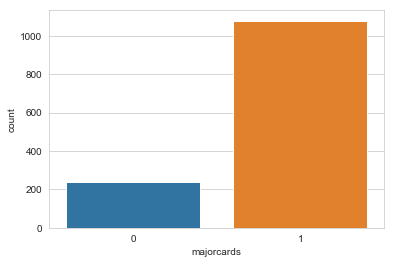

In [60]:
sns.countplot(x='majorcards',data=credit)

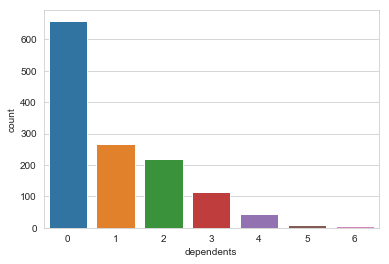

In [61]:
sns.countplot(x='dependents',data=credit)

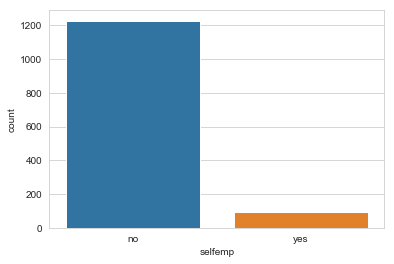

In [62]:
sns.countplot(x='selfemp',data=credit)

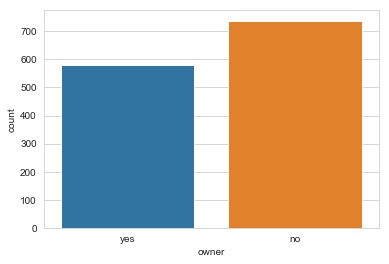

In [63]:
sns.countplot(x='owner',data=credit)

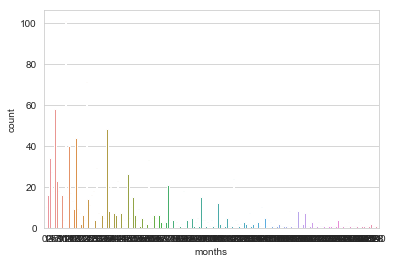

In [64]:
sns.countplot(x='months',data=credit)

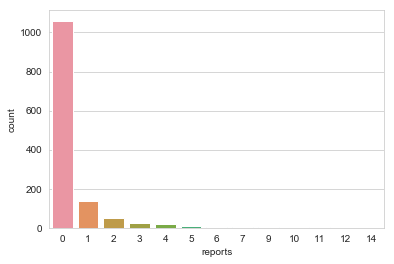

In [65]:
sns.countplot(x='reports',data=credit)

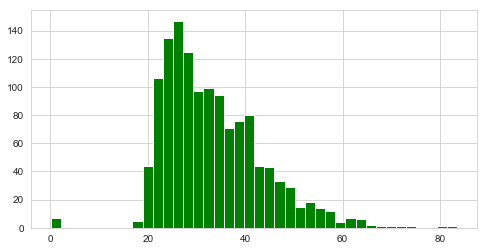

In [66]:
credit['age'].hist(color='green',bins=40,figsize=(8,4))

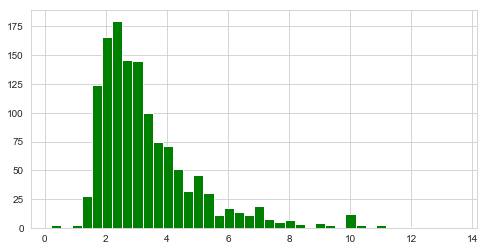

In [67]:
credit['income'].hist(color='green',bins=40,figsize=(8,4))

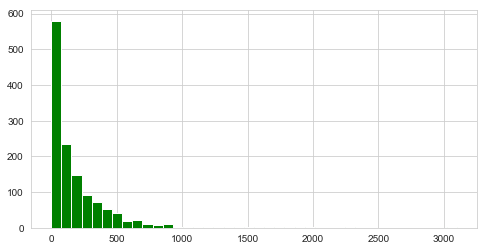

In [68]:
credit['expenditure'].hist(color='green',bins=40,figsize=(8,4))

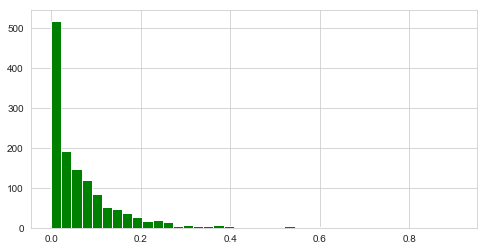

In [69]:
credit['share'].hist(color='green',bins=40,figsize=(8,4))

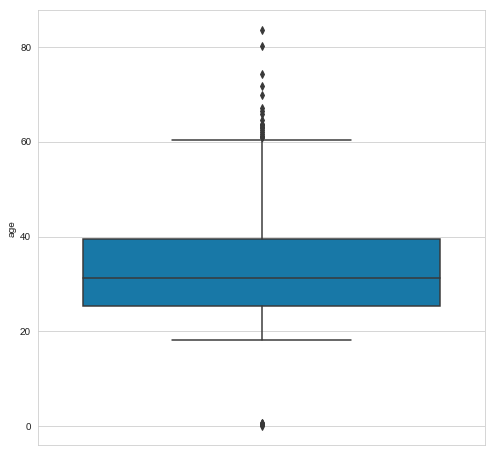

In [70]:
#Median age of the applicants
plt.figure(figsize=(8,8))
sns.boxplot(y='age',data=credit,palette='winter')

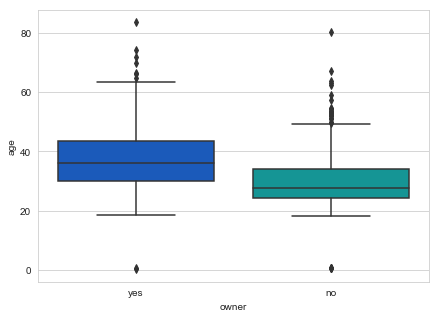

In [71]:
# median age of people who have and don't have houses
# people with houses tend to have higher age
plt.figure(figsize=(7,5))
sns.boxplot(x='owner',y='age',data=credit,palette='winter')

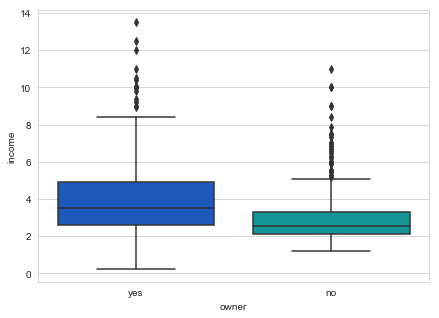

In [72]:
# median income of people who have and don't have houses
# people who have houses tend to have a higher income       
plt.figure(figsize=(7,5))
sns.boxplot(x='owner',y='income',data=credit,palette='winter')

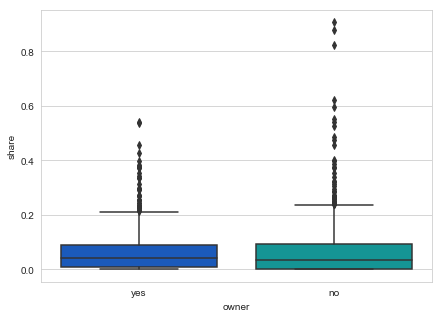

In [73]:
#median share of people who have and don't have houses
#Whether people have houses or not, their share of saving is the same
plt.figure(figsize=(7,5))
sns.boxplot(x='owner',y='share',data=credit,palette='winter')

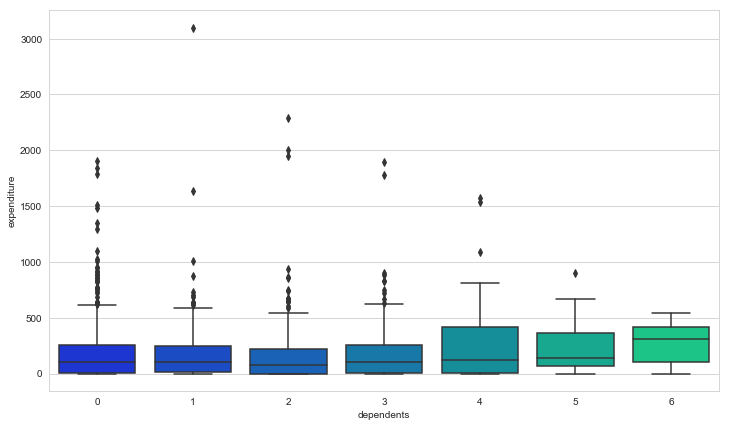

In [74]:
# people have same expenditure irrespective of no. of dependents!!!
# can add hue here
plt.figure(figsize=(12,7))
sns.boxplot(x='dependents',y='expenditure',data=credit,palette='winter')

In [75]:
def impute_AffirmativeNegative(cols):
    affirmativeNegative=cols[0] 
    
    if (affirmativeNegative == 'yes'):    
        return 1
    elif (affirmativeNegative == 'no'):
        return 0
    else:
        return 100   

In [76]:
credit['card']=credit[['card']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [77]:
credit['owner']=credit[['owner']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,no,2,64,1,5


In [78]:
credit['selfemp']=credit[['selfemp']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [79]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null int64
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null int64
selfemp        1319 non-null int64
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(8)
memory usage: 123.7 KB


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(credit.drop('card',axis=1),
                            credit['card'],test_size=0.30,random_state=101)
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  923
No. of Test rows ->  396


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
predictions=logmodel.predict(x_test)
predictions,len(predictions)

(array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [85]:
from sklearn.metrics import classification_report

In [86]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        80
           1       1.00      0.97      0.98       316

   micro avg       0.97      0.97      0.97       396
   macro avg       0.94      0.98      0.96       396
weighted avg       0.98      0.97      0.97       396



In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
print (y_test.value_counts())
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

1    316
0     80
Name: card, dtype: int64
[[ 80   0]
 [ 11 305]]
         Predicted Class 0  Predicted Class 1
Class 0                 80                  0
Class 1                 11                305


In [89]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)
#                 predicted     
#           class-0      class-1
# class-0   TN (151)     FP (12)  
# class-1   FN (36)      TP (68)
#      precision         recall             f1-score                     support
#   0  151/(151+36)=0.81 151/(151+12)=0.93  2*0.81*0.93/(0.81+0.93)=0.86 151+12=163
#   1  68/(68+12)=0.85   68/(68+36)=0.65    2*0.85*0.65/(0.85+0.65)=0.74 36+68=104
#A/T   (151+68)/(151+12  (151+68)/(151+12   2*0.82*0.82/(0.82+0.82)=0.81 163+104=267
#       +36+68)=0.82      +36+68)=0.82

In [90]:
print(logmodel.coef_)

[[-1.42403536e+00 -2.60304756e-02 -2.49972266e-01 -4.69996982e-04
   1.40799402e+00  8.10162918e-01  1.23142587e-01 -3.05221142e-01
   1.78011178e-03 -1.19376938e-01  5.28309019e-02]]


In [91]:
print(logmodel.intercept_)

[-0.94464179]


In [92]:
from sklearn.metrics import accuracy_score
score3=accuracy_score(y_test,predictions)
score3

0.9722222222222222

# DECISION TREE

In [93]:
# Read data from 
import pandas as pd
credit3 = pd.read_csv('credit_card_dataset.csv')
credit3.head()


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [94]:
#Describe a data frame in Python - summary statistics of all the variables
credit3.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [95]:
# Columns
credit3.dtypes.index

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [96]:
# Target Variable to be made {-1, 1}
credit3.card.replace(['no', 'yes'], [0, 1], inplace=True)

In [97]:
# Target Variable to be made {-1, 1}
credit3.owner.replace(['no', 'yes'], [0, 1], inplace=True)

In [98]:
# Target Variable to be made {-1, 1}
credit3.selfemp.replace(['no', 'yes'], [0, 1], inplace=True)

In [99]:
# Count Target Variable Values
credit3.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

In [100]:
# Find % Values of Target Variable Levels
round(credit3.card.value_counts()*100/len(credit3.axes[0]),2)

1    77.56
0    22.44
Name: card, dtype: float64

In [101]:
# Split sample into Train and Test
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(credit3, test_size = 0.3, 
                              random_state = 176)

# Print a few rows
Train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
296,0,0,20.75000,1.95,0.000615,0.00000,0,0,0,14,0,1
557,1,0,40.33333,2.00,0.072386,120.55920,0,0,0,24,1,4
543,1,0,28.16667,2.00,0.060250,100.41670,1,0,1,38,0,8
898,1,0,25.66667,1.70,0.080070,113.09920,0,0,1,27,1,8
1049,1,1,35.83333,2.40,0.023595,46.60583,0,1,1,37,1,13


In [102]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 1:6]
Train_TargetVar = Train.values[:,0]
print(Train_IndepentVars)
print(Train_TargetVar)

[[0.000000e+00 2.075000e+01 1.950000e+00 6.153850e-04 0.000000e+00]
 [0.000000e+00 4.033333e+01 2.000000e+00 7.238550e-02 1.205592e+02]
 [0.000000e+00 2.816667e+01 2.000000e+00 6.025000e-02 1.004167e+02]
 ...
 [0.000000e+00 2.833333e+01 6.200000e+00 6.892936e-02 3.559683e+02]
 [0.000000e+00 3.783333e+01 5.160000e+00 2.325580e-04 0.000000e+00]
 [0.000000e+00 3.175000e+01 1.099990e+01 1.070092e-02 9.742416e+01]]
[0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1

In [103]:
print ("Total rows = ", len(Train_TargetVar))
print ("Total A-rows = ", (Train_TargetVar == 1).sum())
print ("Total B-rows = ",(Train_TargetVar == 0).sum())

Total rows =  923
Total A-rows =  724
Total B-rows =  199


In [104]:
# Load library
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [105]:
from sklearn import tree
with open("credit_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

In [106]:
score4=dt_train_gini.score(Train_IndepentVars, Train_TargetVar)
score4

0.9859154929577465

This step create a text file dt_train_gini.txt in the default folder. 
We can give full path as well. We can copy the context of this text file and put
into the box on http://www.webgraphviz.com/

# operating characteristic curve

In [117]:
# Preliminaries
# Load libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [118]:
#reading the csv file
credit7=pd.read_csv("credit_card_dataset.csv")
credit7.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [119]:
def impute_AffirmativeNegative(cols):
    affirmativeNegative=cols[0] 
    
    if (affirmativeNegative == 'yes'):    
        return 1
    elif (affirmativeNegative == 'no'):
        return 0
    else:
        return 100 

In [120]:
credit7['card']=credit7[['card']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit7.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [121]:
credit7['owner']=credit7[['owner']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit7.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,no,2,64,1,5


In [122]:
credit7['selfemp']=credit7[['selfemp']].apply(impute_AffirmativeNegative,axis=1)  # meaning of axis=1?
credit7.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [123]:
X=credit7.drop('card',axis=1)
print(X.head())
y=credit7['card']
print(y.head())

   reports       age  income     share  expenditure  owner  selfemp  \
0        0  37.66667  4.5200  0.033270   124.983300      1        0   
1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2        0  33.66667  4.5000  0.004156    15.000000      1        0   
3        0  30.50000  2.5400  0.065214   137.869200      0        0   
4        0  32.16667  9.7867  0.067051   546.503300      1        0   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  
0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64


In [124]:
x_train,x_test,y_train,y_test=train_test_split(credit7.drop('card',axis=1),
                            credit7['card'],test_size=0.30,random_state=101)
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  923
No. of Test rows ->  396


In [125]:
# Training Binary Classifier
# Create classifier
clf = LogisticRegression()

# Train model
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
# Create Predicted Probabilities
# Get predicted probabilities
y_score = clf.predict_proba(x_test)[:,1]
y_score

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999976e-01, 9.99999986e-01, 7.02721775e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.35194779e-01, 1.00000000e+00, 1.00000000e+00,
       4.04355053e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.45175682e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999999e-01, 1.00000000e+00, 4.70753759e-02, 1.00000000e+00,
       1.00000000e+00, 7.78092648e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 8.46207784e-03, 1.00000000e+00, 9.90450843e-02,
       1.00000000e+00, 1.00000000e+00, 4.37821768e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [127]:
'''
no. of actually Positive samples (P)
no. of actually Negative samples (N)
no. of True Positives (TP)
   hit; correctly classified as Positive
no. of True Negatives (TN)
   correct rejection; correctly classified as Negative
no. of False Positives (FP)
   false alarm, Type I error; wrongly classified as Positive
no. of False Negatives (FN)
   miss, Type II error; wrongly classified as Negative

Sensitivity or True Positive Rate (TPR)
   also called Hit Rate, Recall
   TPR=TP/P=TP/(TP+FN)

Fall-Out or False Positive Rate (FPR)
   FPR=FP/N=FP/(FP+TN)=1-SPC 

Specificity (SPC) or True Negative Rate
   SPC=TN/N=TN/(TN+FP)

Precision or Positive Predictive Value (PPV)
   PPV=TP/(TP+FP)

Accuracy (ACC)
   ACC=(TP+TN)/(TP+FP+FN+TN)

F1 Score
   is the harmonic mean of Precision and Sensitivity
   F1 Score = 2*Precision*Recall/(Precision+Recall)

Refer https://en.wikipedia.org/wiki/Sensitivity_and_specificity
'''

'\nno. of actually Positive samples (P)\nno. of actually Negative samples (N)\nno. of True Positives (TP)\n   hit; correctly classified as Positive\nno. of True Negatives (TN)\n   correct rejection; correctly classified as Negative\nno. of False Positives (FP)\n   false alarm, Type I error; wrongly classified as Positive\nno. of False Negatives (FN)\n   miss, Type II error; wrongly classified as Negative\n\nSensitivity or True Positive Rate (TPR)\n   also called Hit Rate, Recall\n   TPR=TP/P=TP/(TP+FN)\n\nFall-Out or False Positive Rate (FPR)\n   FPR=FP/N=FP/(FP+TN)=1-SPC \n\nSpecificity (SPC) or True Negative Rate\n   SPC=TN/N=TN/(TN+FP)\n\nPrecision or Positive Predictive Value (PPV)\n   PPV=TP/(TP+FP)\n\nAccuracy (ACC)\n   ACC=(TP+TN)/(TP+FP+FN+TN)\n\nF1 Score\n   is the harmonic mean of Precision and Sensitivity\n   F1 Score = 2*Precision*Recall/(Precision+Recall)\n\nRefer https://en.wikipedia.org/wiki/Sensitivity_and_specificity\n'

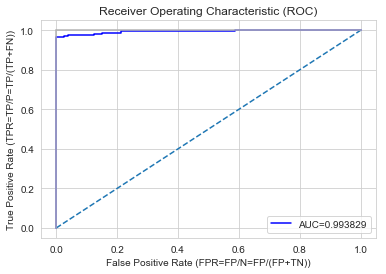

In [128]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [129]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)

# Cross-Validate Model Using Recall
cross_val_score(clf, X, y, scoring="recall")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.97947214, 0.97947214, 0.97360704])

In [130]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)

# Cross-validate model using precision
cross_val_score(clf, X, y, scoring="precision")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1.        , 0.99701493, 1.        ])

## Best Fit Model

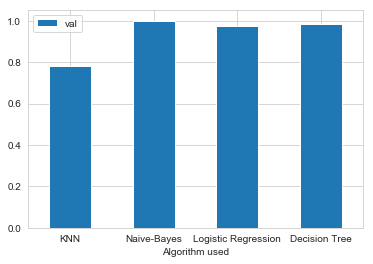

In [133]:
# We plot the scores obtained from different models used for prediction
>>> df = pd.DataFrame({'Algorithm used':['KNN', 'Naive-Bayes', 'Logistic Regression','Decision Tree'], 'val':[score1, score2, score3,score4]})
>>> ax = df.plot.bar(x='Algorithm used', y='val', rot=0)


In [134]:
# Each of Naive-Bayes, Logistic regression, Decision Tree are good prediction models for 
# this particular dataset, each having a score greater than 90%. Going by statistics, we conclude
# that the Naive-Bayes algorithm is the best fit model for the prediction.